In [1]:
import pandas as pd
import numpy as np
#from ml_metrics import rmsle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db1 = pd.read_csv('201701-citibike-tripdata.csv')
db2 = pd.read_csv('201702-citibike-tripdata.csv')
db3 = pd.read_csv('201703-citibike-tripdata.csv')
db4 = pd.read_csv('201704-citibike-tripdata.csv')
db5 = pd.read_csv('201705-citibike-tripdata.csv')

In [3]:
db6 = pd.read_csv('201706-citibike-tripdata.csv')
db7 = pd.read_csv('201707-citibike-tripdata 2.csv')
db8 = pd.read_csv('201708-citibike-tripdata.csv')
db9 = pd.read_csv('201709-citibike-tripdata.csv')

In [4]:
db10 = pd.read_csv('201710-citibike-tripdata 2.csv')
db11 = pd.read_csv('201711-citibike-tripdata.csv')
db12 = pd.read_csv('201712-citibike-tripdata.csv')

In [5]:
db1= db1[['Start Time','Start Station ID']]
db2= db2[['Start Time','Start Station ID']]
db3= db3[['Start Time','Start Station ID']]
db4= db4[['starttime','start station id']]
db5= db5[['starttime','start station id']]
db6= db6[['starttime','start station id']]

In [6]:
db7= db7[['starttime','start station id']]
db8= db8[['starttime','start station id']]
db9= db9[['starttime','start station id']]
db10= db10[['starttime','start station id']]
db11= db11[['starttime','start station id']]
db12= db12[['starttime','start station id']]

In [7]:
db1 = db1.rename(columns={'Start Time': 'starttime', 'Start Station ID': 'start station id'})
#db1 = db1.rename(columns={'Start Time': 'starttime', 'Start Station ID': 'start station id'})
#db1 = db1.rename(columns={'Start Time': 'starttime', 'Start Station ID': 'start station id'})

In [8]:
db2 = db2.rename(columns={'Start Time': 'starttime', 'Start Station ID': 'start station id'})
db3 = db3.rename(columns={'Start Time': 'starttime', 'Start Station ID': 'start station id'})

In [9]:
df=pd.concat([db1,db2,db3,db4,db5,db6,db7,db8,db9,db10,db11,db12])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16364657 entries, 0 to 889966
Data columns (total 2 columns):
starttime           object
start station id    int64
dtypes: int64(1), object(1)
memory usage: 374.6+ MB


In [11]:
df["starttime"] = pd.to_datetime(df["starttime"])

In [12]:
df['starttime'] = df['starttime'].apply(lambda t: t.replace(second=0))
df['starttime'] = df['starttime'].apply(lambda t: t.replace(minute=0))
new01=df.groupby(['start station id','starttime']).size().reset_index(name='count')

In [13]:
new01.head()

,start station id,starttime,count
0,72,2017-01-01 02:00:00,1
1,72,2017-01-01 03:00:00,1
2,72,2017-01-01 05:00:00,2
3,72,2017-01-01 08:00:00,2
4,72,2017-01-01 09:00:00,1


In [83]:
#new01.columns = [['start station id','date','count']]

In [22]:
new01.head()

,start station id,starttime,count
0,72,2017-01-01 02:00:00,1
1,72,2017-01-01 03:00:00,1
2,72,2017-01-01 05:00:00,2
3,72,2017-01-01 08:00:00,2
4,72,2017-01-01 09:00:00,1


In [14]:
mylist = new01['start station id'].unique()
stationdict = {elem : pd.DataFrame() for elem in mylist}
#d = {name: pd.DataFrame() for name in companies}
#companydict
for key in stationdict:
    stationdict[key] = new01[:][new01['start station id'] == key]

In [15]:
stationdict[3631]

,start station id,starttime,count
3164798,3631,2017-12-30 16:00:00,1


In [16]:
w01 = pd.read_csv('NYChour2017-1.csv')

In [17]:
w01["date"] = pd.to_datetime(w01["date"])
w01['month']=w01.date.dt.month 

In [18]:
wholelist = {}
for n in mylist:
   wholelist[n] = pd.DataFrame()

In [19]:
dummy=pd.get_dummies(w01['weather_main'])
dummy.head()
w01=pd.concat([w01,dummy], axis=1)

In [20]:
w01 = w01.rename(columns={'date': 'starttime'})

In [21]:
for n in mylist:
  wholelist[n]=pd.merge(w01, stationdict[n], how='outer', on='starttime')
  wholelist[n]['start station id']= wholelist[n]['start station id'].fillna(value=n)
  wholelist[n]['count']= wholelist[n]['count'].fillna(value=0) 

In [22]:
for n in mylist:
    wholelist[n]['countbefore']=wholelist[n]['count'].shift()
    wholelist[n]['countbefore']= wholelist[n]['countbefore'].fillna(value=0) 

In [22]:
for n in mylist:
     wholelist[n].drop('weather_main', axis=1)

In [23]:
for n in mylist:
     wholelist[n]['weather_main']= wholelist[n]['weather_main'].fillna(value=0) 

In [23]:
for n in mylist:
     wholelist[n]['temp']= wholelist[n]['temp'].fillna(value=0)
     wholelist[n]['Clouds']= wholelist[n]['Clouds'].fillna(value=0)
     wholelist[n]['wind_speed']= wholelist[n]['wind_speed'].fillna(value=0)
     wholelist[n]['Clear']= wholelist[n]['Clear'].fillna(value=0)
     wholelist[n]['Drizzle']= wholelist[n]['Drizzle'].fillna(value=0)
     wholelist[n]['Haze']= wholelist[n]['Haze'].fillna(value=0)
     wholelist[n]['Fog']= wholelist[n]['Fog'].fillna(value=0)
     wholelist[n]['Mist']= wholelist[n]['Mist'].fillna(value=0)
     wholelist[n]['Rain']= wholelist[n]['Rain'].fillna(value=0)
     #wholelist[n]['pressure']= wholelist[n]['pressure'].fillna(value=0)
     wholelist[n]['Snow']= wholelist[n]['Snow'].fillna(value=0)
     wholelist[n]['humidity']= wholelist[n]['humidity'].fillna(value=0)   
     wholelist[n]['Thunderstorm']= wholelist[n]['Thunderstorm'].fillna(value=0)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
for n in mylist:
    y = wholelist[n]['count']
    x = wholelist[n][['temp','humidity','Clouds','wind_speed','Clear','Drizzle','Haze','Fog','Mist','Rain','Snow','Thunderstorm']]
    lm = LinearRegression()   
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
    lm.fit(X_train,y_train)
    predictionstest = lm.predict(X_test)
    new04.loc[new04['station ID'] == n, 'MSE'] = round(mean_squared_error(y_test, predictionstest),2)
    new04.loc[new04['station ID'] == n, 'R-2'] = round(r2_score(y_test, predictionstest),2)

In [65]:
new03

,station ID,MSE,R-2
0,72,16.16,0.44
1,79,8.14,0.43
2,82,2.37,0.23
3,83,3.34,0.29
4,116,16.61,0.45
5,119,0.46,0.05
6,120,1.9,0.18
7,127,28.78,0.54
8,128,28.42,0.56
9,143,7.35,0.32


In [47]:
y = wholelist[72]['count']
x = wholelist[72][['countbefore','temp','humidity','Clouds','wind_speed','Clear','Drizzle','Haze','Fog','Mist','Rain','Snow','Thunderstorm']]
lm = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
predictionstest = lm.predict(X_test)

###from here

In [24]:
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [31]:
for n in mylist:
     wholelist[n]=wholelist[n].drop('weather_main', axis=1)

In [30]:
for n in mylist:
     wholelist[n]=wholelist[n].drop('start station id', axis=1)

In [28]:
for n in mylist:
     wholelist[n]=wholelist[n].drop('month', axis=1)

In [35]:
for n in mylist:
    wholelist[n].set_index('starttime', inplace=True)

In [31]:
wholelist[72]

,starttime,temp,pressure,humidity,wind_speed,weather_main,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,sonw,count
0,2017-01-01 00:00:00,278.76,1014,44,4,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,2017-01-01 01:00:00,278.69,1014,48,4,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,2017-01-01 02:00:00,278.92,1013,48,3,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,1.0
3,2017-01-01 03:00:00,278.65,1013,48,2,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,1.0
4,2017-01-01 04:00:00,278.84,1013,45,1,Snow,0,0,0,0,0,0,0,0,0,1,0,0,0.0
5,2017-01-01 05:00:00,279.07,1013,45,2,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,2.0
6,2017-01-01 06:00:00,279.14,1013,45,2,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,0.0
7,2017-01-01 07:00:00,279.21,1012,45,3,sonw,0,0,0,0,0,0,0,0,0,0,0,1,0.0
8,2017-01-01 08:00:00,279.43,1013,45,3,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,2.0
9,2017-01-01 09:00:00,279.50,1014,42,4,Clouds,0,1,0,0,0,0,0,0,0,0,0,0,1.0


In [41]:
for n in mylist:
    wholelist[n]=wholelist[n].drop('pressure', axis=1)

In [29]:
for n in mylist:
    wholelist[n]=wholelist[n].drop('month', axis=1)

In [36]:
for n in mylist:
    wholelist[n]['weather_main'] = wholelist[n]['weather_main'].astype(str)


In [32]:
for n in mylist[0:5]:
    print(n)

72
79
82
83
116


In [37]:
for n in mylist:
    encoder = LabelEncoder()
    wholelist[n]['weather_main']=encoder.fit_transform(wholelist[n]['weather_main'])

In [51]:
for n in mylist:
    wholelist[n]=wholelist[n].drop('sonw', axis=1)

In [34]:
for n in mylist:
    wholelist[n].set_index('starttime', inplace=True)

In [59]:
def super11(a):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(wholelist[a].values)
    reframed = series_to_supervised(scaled, 1, 1)
    reframed.drop(reframed.columns[[5,6,7,8,9,10]], axis=1, inplace=True)
    values = reframed.values
    n_train_hours =6132 
#365 * 24 *0.7
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
# split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    model = Sequential()
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
# invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    #new04.loc[new04['station ID'] == a, 'MSE'] = round(mean_squared_error(inv_y, inv_yhat),2)
    #new04.loc[new04['station ID'] == a, 'R-2'] = round(r2_score(inv_y, inv_yhat),2)
    print(round(mean_squared_error(inv_y, inv_yhat),2))

In [60]:
for n in mylist[:1]:
    super11(n)

(6132, 1, 5) (6132,) (2626, 1, 5) (2626,)
Train on 6132 samples, validate on 2626 samples
Epoch 1/50
 - 1s - loss: 0.0156 - val_loss: 0.0164
Epoch 2/50
 - 0s - loss: 0.0159 - val_loss: 0.0163
Epoch 3/50
 - 0s - loss: 0.0159 - val_loss: 0.0163
Epoch 4/50
 - 0s - loss: 0.0158 - val_loss: 0.0163
Epoch 5/50
 - 0s - loss: 0.0158 - val_loss: 0.0162
Epoch 6/50
 - 0s - loss: 0.0157 - val_loss: 0.0162
Epoch 7/50
 - 0s - loss: 0.0158 - val_loss: 0.0160
Epoch 8/50
 - 0s - loss: 0.0157 - val_loss: 0.0160
Epoch 9/50
 - 0s - loss: 0.0158 - val_loss: 0.0160
Epoch 10/50
 - 0s - loss: 0.0158 - val_loss: 0.0159
Epoch 11/50
 - 0s - loss: 0.0158 - val_loss: 0.0159
Epoch 12/50
 - 0s - loss: 0.0158 - val_loss: 0.0159
Epoch 13/50
 - 0s - loss: 0.0158 - val_loss: 0.0158
Epoch 14/50
 - 0s - loss: 0.0158 - val_loss: 0.0158
Epoch 15/50
 - 0s - loss: 0.0158 - val_loss: 0.0158
Epoch 16/50
 - 0s - loss: 0.0158 - val_loss: 0.0158
Epoch 17/50
 - 0s - loss: 0.0158 - val_loss: 0.0158
Epoch 18/50
 - 0s - loss: 0.0158 - 

In [54]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [105]:
new04.to_csv('RNN Result.csv', encoding='utf-8', index=False)

In [64]:
def super111():   
    model = Sequential()
    model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
    history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], 5))
# invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
# invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    new04.loc[new04['station ID'] == n, 'MSE'] = round(mean_squared_error(inv_y, inv_yhat),2)
    new04.loc[new04['station ID'] == n, 'R-2'] = round(r2_score(inv_y, inv_yhat),2)

In [61]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.931


In [26]:
new03=pd.DataFrame(columns=['station ID','MSE','R-2'])

In [67]:
new04=pd.DataFrame(columns=['station ID','MSE','R-2'])

In [68]:
new04['station ID']=mylist

In [71]:
new04.to_csv('LR Result no previous.csv', encoding='utf-8', index=False)

In [51]:
wholelist1=wholelist.copy()

## ARIMA

In [75]:
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import sys
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [44]:
wholelist1[72]=wholelist[72][['starttime','count']]

In [52]:
for n in mylist:
    wholelist1[n]=wholelist[n][['starttime','count']]

In [53]:
for n in mylist:
    wholelist1[n].set_index('starttime', inplace=True)

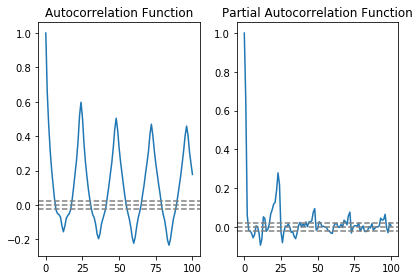

In [43]:
lag_acf = acf(wholelist[72]['count'], nlags=100)
lag_pacf = pacf(wholelist[72]['count'], nlags=100, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(wholelist[72]['count'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(wholelist[72]['count'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(wholelist[72]['count'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(wholelist[72]['count'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [56]:
ads_diff={}
= wholelist[72]['count'] - wholelist[72]['count'].shift(24)

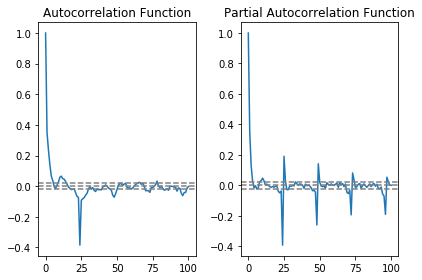

In [57]:
lag_acf = acf(ads_diff[24:], nlags=100)
lag_pacf = pacf(ads_diff[24:], nlags=100, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ads_diff[24:])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ads_diff[24:])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ads_diff[24:])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ads_diff[24:])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'RSS: 132028.9028507')

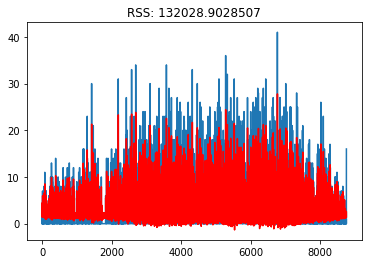

In [209]:
model = ARIMA(wholelist[72]['count'], order=(6, 0, 3))  
results_AR = model.fit(disp=-1)  


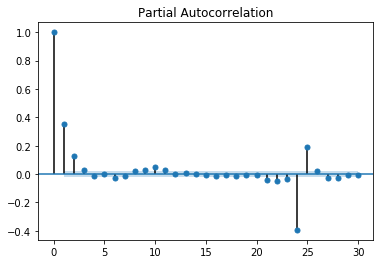

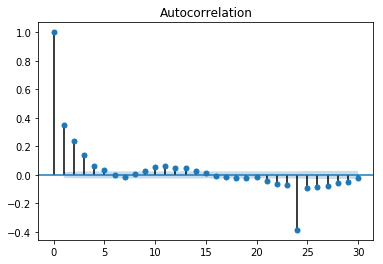

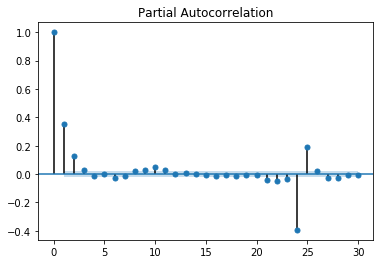

In [59]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ads_diff[24+1:], lags=30) # 
sm.graphics.tsa.plot_pacf(ads_diff[24+1:], lags=30)# , 

In [ ]:
ads_diff = wholelist[72]['count'] - wholelist[72]['count'].shift(24)

In [49]:
wholelist1[82]['count']=wholelist[82]['count'].fillna(value=0)

In [72]:
ads_diff= wholelist[79]['count'] - wholelist[79]['count'].shift(24)
#transparams=False

In [73]:
from numpy.linalg import LinAlgError

In [ ]:
X=ads_diff[24:].values
size =200
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit(disp=0,transparams=False)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
mse = mean_squared_error(test, predictions)
print(mse)